<h1><center> MATH-GA 2840 HW#7</center></h1>
<h3 align="right">Yifei(Fahy) Gao yg1753</h3>

1 (a): 

By the formula (9) on the notes: $\hat{y}[k]=\frac{\hat{x}\left[k-k^{*}\right]+\hat{x}\left[k+k^{*}\right]}{2}$， 
and we know that $k^*=[C_1, C_2]$, so we can get the DFTs of x and y as: 


$$\hat{x}[j]cos(\frac{2\pi C_1 j}{N})=\frac{\hat{x}\left[j-C_1\right]+\hat{x}\left[j+C_1\right]}{2}$$

$$\hat{y}[j]cos(\frac{2\pi C_2 j}{N})=\frac{\hat{y}\left[j-C_2\right]+\hat{y}\left[j+C_2\right]}{2}$$

Then:

$$\hat{z}[j]=\frac{\hat{x}\left[j-C_1\right]+\hat{x}\left[j+C_1\right]}{2}+\frac{\hat{y}\left[j-C_2\right]+\hat{y}\left[j+C_2\right]}{2}$$

since $C_2>C_1+a+b$ and $C_1>a$, then I can draw the following graph: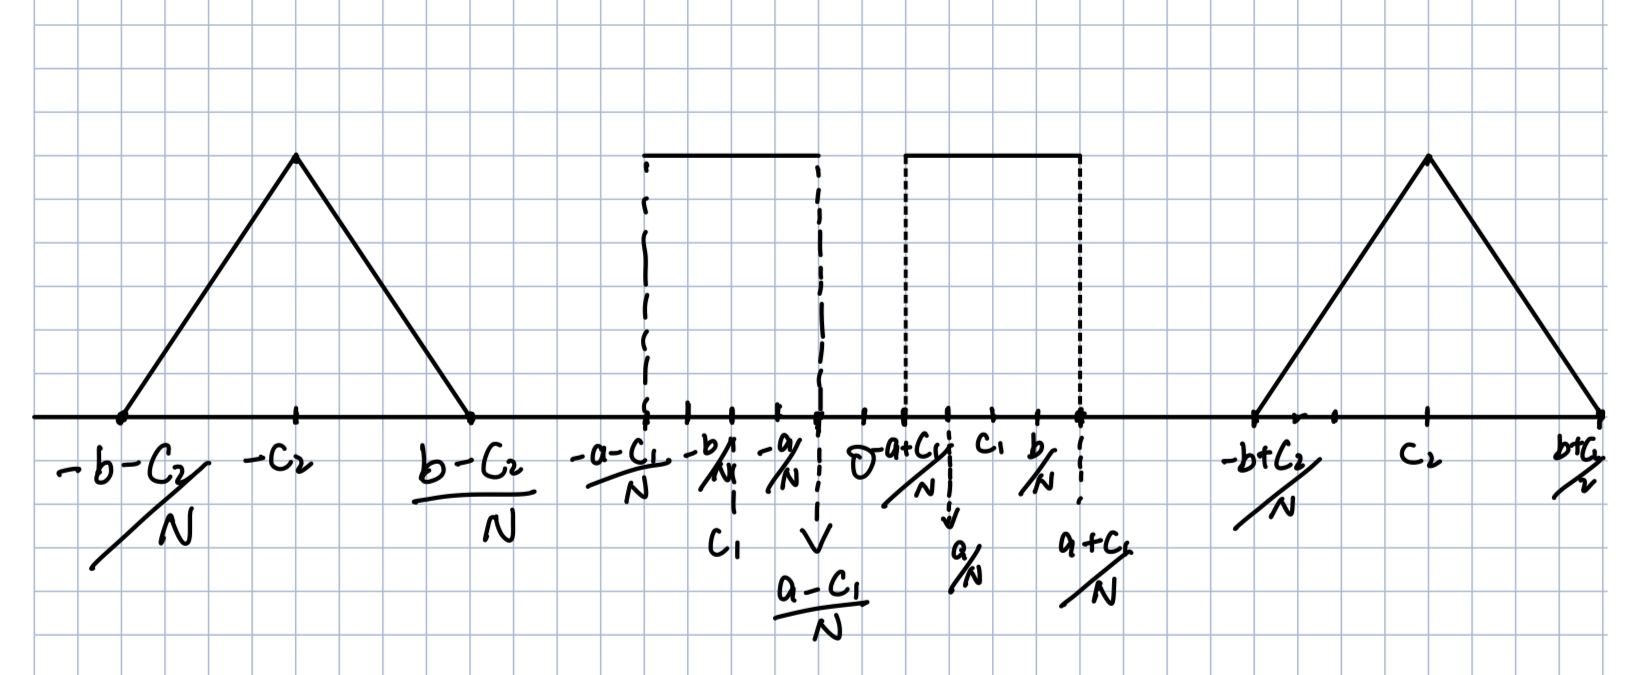


(b):

Let $R=C_1, B=a$

$$\hat{w}[j]=\hat{z}[j-C_1]+\hat{z}[j+C_1]\\
=\hat{x}[j]+\frac{\hat{x}\left[j-2C_1\right]+\\
\hat{x}\left[j+2C_1\right]}{2}+\\
\frac{\hat{y}\left[j-(C_1+C_2)\right]+\hat{y}\left[j-(C_2-C_1)\right]}{2}+\\
\frac{\hat{y}\left[j+(C_1+C_2)\right]+\hat{y}\left[j+(C_2-C_1)\right]}{2}$$

Then the graph is: 

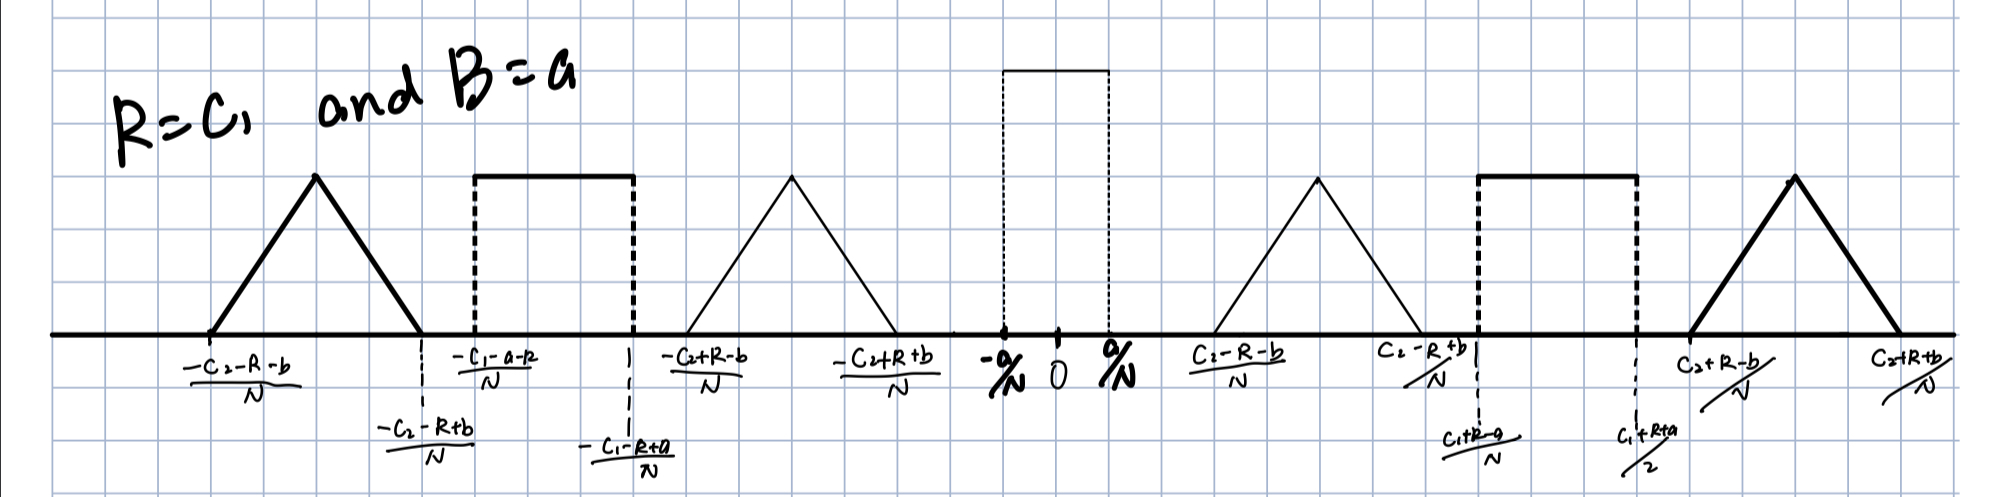


(c):

Let $R=C_2, B=b$
$$\hat{w}[j]=\hat{z}[j-C_2]+\hat{z}[j+C_2]=\hat{y}[j]+\frac{\hat{y}\left[j-2C_2\right]+\hat{y}\left[j+2C_2\right]}{2}+\\
\frac{\hat{x}\left[j-(C_1+C_2)\right]+\hat{y}\left[j-(C_2-C_1)\right]}{2}+\frac{\hat{x}\left[j+(C_1+C_2)\right]+\hat{y}\left[j+(C_2-C_1)\right]}{2}$$

Then graph is: 

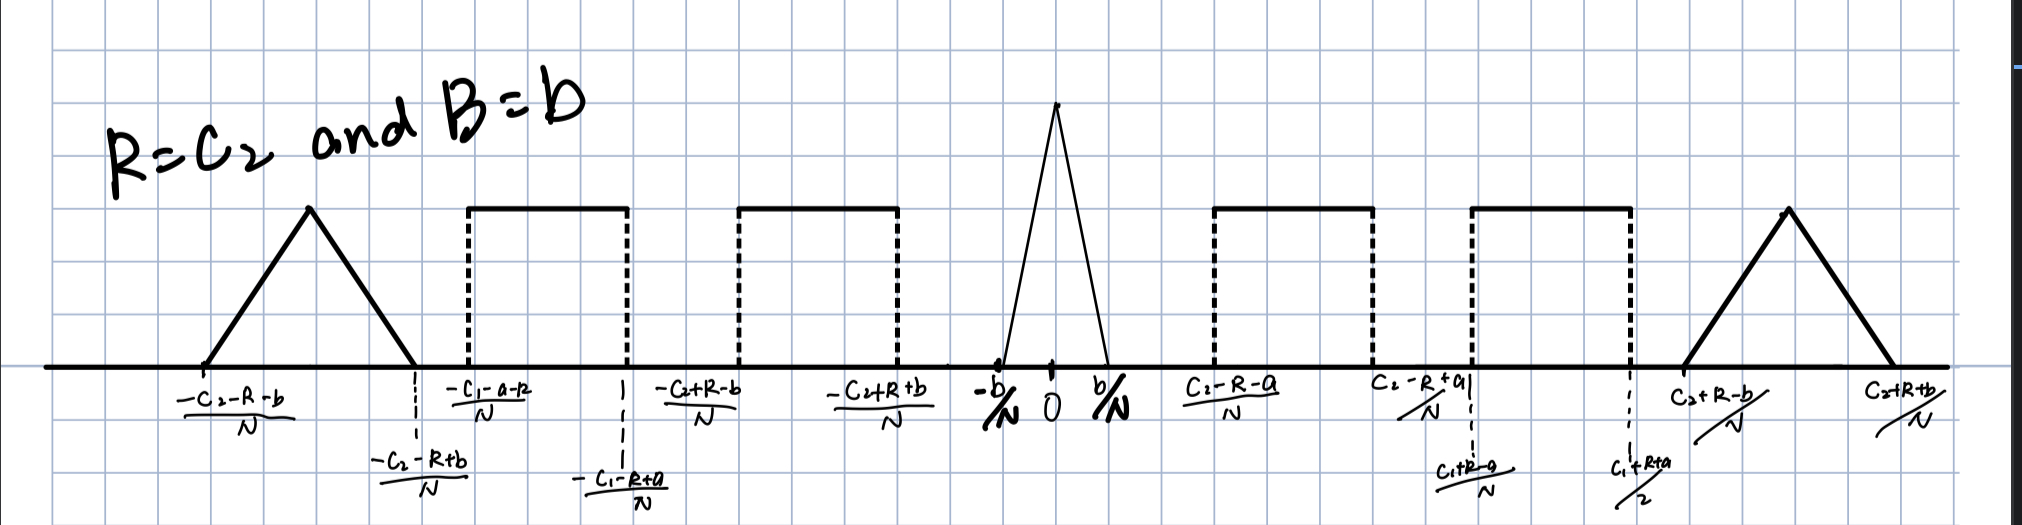

(d): 

If $C_2 <2a+b$, then it does not work because then it will overlap in the DFT coefficients between $\hat{x}$ and $\hat{y}$, then it will definitely not recover the original signals since DFT is not seperate.

2. (Hann window) In this problem we analyze the Hann window in the frequency domain.
(a) The Hann window $h \in \mathbb{C}^{N}$ of width $2 w$ equals
$$
h[j]:=\left\{\begin{array}{ll}
\frac{1}{2}\left(1+\cos \left(\frac{\pi j}{w}\right)\right) & \text { if }|j| \leq w \\
0 & \text { otherwise }
\end{array}\right.
$$


Express the DFT of $h$ in terms of three shifted, scaled copies of the DFT of a rectangular window of length $2 w$.
(b) Plot the DFT of $h$ as well as the three different components that you derived in the previous question. Interpret what you see in terms of the desired properties of a windowing function.

For $h[j]\le w$, since from notes we know that: $$cos(\frac{\pi j}{w})=\frac{exp(\frac{i\pi j}{w})+exp(\frac{-i\pi j}{w})}{2}$$

Then: 

$$h[j]=\frac{1}{2}\left(1+\cos \left(\frac{\pi j}{w}\right)\right)\\
=\frac{1}{2}\left(1+\frac{exp(\frac{i\pi j}{w})+exp(\frac{-i\pi j}{w})}{2}\right)\\
=\frac{1}{2}\left(1+\frac{exp(\frac{i\pi j(\frac{N}{w})}{N})+exp(\frac{-i\pi j(\frac{N}{N})}{X})}{2}\right)$$



Then according to the formula of DFT, we get:

$$\hat{h}[k]=\Sigma^{N}_{j=1}h[j]exp{\frac{-2\pi k j }{N}}\\=\Sigma^{N}_{j=1}\frac{1}{2}\left(1+\frac{exp(\frac{i\pi j(\frac{N}{w})}{N})+exp(\frac{-i\pi j(\frac{N}{N})}{X})}{2}\right)exp{\frac{-2\pi k j }{N}}\\
=\frac{1}{2}\Sigma^{N}_{j=1}exp({\frac{-2\pi k j }{N}})\vec{\pi}[j]+\\
\frac{1}{4}\Sigma^{N}_{j=1}\exp(\frac{-2i \pi (k-\frac{N}{2w}j)}{N})\vec{\pi}[j]+\\
\frac{1}{4}\Sigma^{N}_{j=1}\exp(\frac{-2i \pi (k+\frac{N}{2w}j)}{N})\vec{\pi}[j]$$



Then we notice that for the DFT coefficient of $\hat{\pi}$, we can define it as: 

$$
\hat{\pi}[k]^{\downarrow N / 2 w}=\sum_{j=1}^{N} \exp \left(-\frac{i 2 \pi(k-N / 2 w) j}{N}\right) \vec{\pi}[j]
$$
Therefore, the expression can be written as
$$
\hat{h}[k]=\frac{1}{2} \hat{\pi}[k]+\frac{1}{4} \hat{\pi}[k]^{\downarrow N / 2 w}+\frac{1}{4} \hat{\pi}[k]^{\downarrow-N / 2w}
$$


(b) Plot the DFT of h as well as the three different components that you derived in the
previous question. Interpret what you see in terms of the desired properties of a
windowing function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Setup 
w = 40 
N = 500
k= np.arange(-N/2+1,N/2,1,dtype=int)
pi_hat= np.empty(k.shape, dtype = complex)

#first term
for i in range(len(k)):
    k_th=0
    for j in range(N):
        if np.abs(j)<=w:
            pi=1
        else:
            pi = 0 
        k_th += np.exp(-1j*2*np.pi*k[i]*j/N)*pi
    pi_hat[i]=k_th
result_first_term=pi_hat*1/2


#second term
w = 40 
N = 500
k= np.arange(-N/2+1,N/2,1,dtype=int)
pi_hat= np.empty(k.shape, dtype = complex)
for i in range(len(k)):
    k_th=0
    for j in range(N):
        if np.abs(j)<=w:
            pi=1
        else:
            pi = 0 
        k_th += np.exp(-1j*2*np.pi*(k[i]+N/(2*w))*j/N)*pi
    pi_hat[i]=k_th
result_second_term=pi_hat*1/4

#third term
w = 40 
N = 500
k= np.arange(-N/2+1,N/2,1,dtype=int)
pi_hat= np.empty(k.shape, dtype = complex)
for i in range(len(k)):
    k_th=0
    for j in range(N):
        if np.abs(j)<=w:
            pi=1
        else:
            pi = 0 
        k_th += np.exp(-1j*2*np.pi*(k[i]-N/(2*w))*j/N)*pi
    pi_hat[i]=k_th
result_third_term=pi_hat*1/4

Text(0.5, 0, 'frequency')

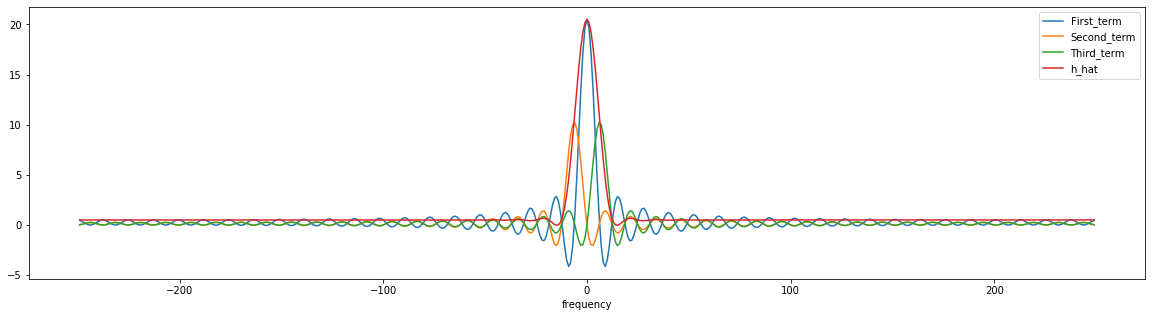

In [28]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(np.arange(-N/2+1,N/2,1,dtype=int),np.real(result_first_term),label='First_term')
ax.plot(np.arange(-N/2+1,N/2,1,dtype=int),np.real(result_second_term),label='Second_term')
ax.plot(np.arange(-N/2+1,N/2,1,dtype=int),np.real(result_third_term),label='Third_term')
ax.plot(np.arange(-N/2+1,N/2,1,dtype=int),np.real(result_first_term+result_second_term+result_third_term),label='h_hat')
ax.legend()
ax.set_xlabel('frequency')


We can see from the above plot that the some of the amplitudes cancel, and the cancellation eliminate the distortion in the frequency domain for rectangular windows. 


3. (STFT inverse) In this problem we show a simple way to invert the STFT.

(a) In the definition of the STFT set $w[l]$ to be a rectangular window where all entries
are equal to one, and let αov = 0.5. Show that the STFT can be inverted using just
two operations: applying the inverse DFT and subsampling.


We know $\alpha_{ov}$ = 0.5, $w_{[l]}(n) = 1$, where $n =0,1,2,...,l-1$. And $s^{th}$ $w_{[l]}$ performed on x of the length N will result in: 

$$x(n)w(n-\frac{sl}{2})$$

Also we know from the notes, the STFT is given by: 

$$\hat{x}(s,w)=DFT(x(n) w(n-\frac{sl}{2})$$

Then the inverse will be: 

$$x(n)=\Sigma_{s} DFT^{-1}\{DFT(x(n) w(n-\frac{sl}{2})\}w(n-\frac{sl}{2})=\Sigma_s x(n) w(n-\frac{sl}{2})^2$$

Then if $w(n-\frac{sl}{2})^2=1$, we can recover the signal x(n).

So we can see that this is a periodic expression with period = $\frac{l}{2}$, and the condition can be induced to: 


$$w^2(n)+w^2(n+\frac{l}{2})$$

Thus it can be done by subsampling the distinct points. By using the notation from the beyond fourier notes, we get: 


$$\left[\begin{array}{c}
\operatorname{STFT}_{[l]}^{\prime}(x)[0,0] \\
\vdots \\
\operatorname{STFT}_{[l]}^{\prime}(x)[l-1,0] \\
\operatorname{STFT}_{[l]}^{\prime}(x)[0,1] \\
\vdots \\
\operatorname{STFT}_{[l]}^{\prime}(x)[l-1,1] \\
\vdots
\end{array}\right]=\left[\begin{array}{cccc}
\operatorname{diag}\left(w_{[l]}\right) & 0 & 0 & \ldots \\
0 & \operatorname{diag}\left(w_{[l]}\right) & 0 & \ldots \\
0 & 0 & \operatorname{diag}\left(w_{[l]}\right) & \ldots \\
0 & 0 & \vdots & \vdots & \ddots
\end{array}\right]x,$$

Where $\operatorname{STFT}_{[l]}^{\prime}(x)$ reperents the vector after applying the inverse DFT to STFT coefficients. 

$$x=\left[\begin{array}{cccc}
\operatorname{diag}^{*}(\left(w_{[l]}\right) & 0 & 0 & \ldots \\
0 & \operatorname{diag}^{*}\left(w_{[l]}\right) & 0 & \ldots \\
0 & 0 & \operatorname{diag}^{*}\left(w_{[l]}\right) & \ldots \\
0 & 0 & \vdots & \vdots & \ddots
\end{array}\right] \left[\begin{array}{c}
\operatorname{STFT}_{[l]}^{\prime}(x)[0,0] \\
\vdots \\
\operatorname{STFT}_{[l]}^{\prime}(x)[l-1,0] \\
\operatorname{STFT}_{[l]}^{\prime}(x)[0,1] \\
\vdots \\
\operatorname{STFT}_{[l]}^{\prime}(x)[l-1,1] \\
\vdots
\end{array}\right]$$ 

Where $\operatorname{diag}^{*}\left(w_{[l]}\right)$ is the inverse of the original $F_{[l]}$ vector. 

(b) What is the disadvantage of using this rectangular window?

we can alternatively formulate the STFT by using windows, and by using the rectangular window we might also induce the discountiuable changes at the edges of the windows. We know these edges will also induce noises DFFT coefficients during Fourier transform. 

4. (STFT of speech signal) In this question, we will analyze the effect of length and type of window while performing STFT. We will perform our analysis on speech signals using the support code provided in class.


(a) Extend the analysis in the notebook to use Hann window of different sizes. Use atleast $[100,500,1000,3000,5000,20000] .$ Please look into nfft argument of scipy.signal.stft () as well.


In [29]:
! wget https://www.openslr.org/resources/1/waves_yesno.tar.gz

--2021-04-04 02:32:44--  https://www.openslr.org/resources/1/waves_yesno.tar.gz
Resolving www.openslr.org... 46.101.158.64
Connecting to www.openslr.org|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4703754 (4.5M) [application/x-gzip]
Saving to: 'waves_yesno.tar.gz'

waves_yesno.tar.gz  100%[===================>]   4.49M  1.71MB/s    in 2.6s    

2021-04-04 02:32:48 (1.71 MB/s) - 'waves_yesno.tar.gz' saved [4703754/4703754]



In [30]:
! tar -xvzf waves_yesno.tar.gz

x waves_yesno/
x waves_yesno/1_0_0_0_0_0_1_1.wav
x waves_yesno/1_1_0_0_1_0_1_0.wav
x waves_yesno/1_0_1_1_1_1_0_1.wav
x waves_yesno/1_1_1_1_0_1_0_0.wav
x waves_yesno/0_0_1_1_1_0_0_0.wav
x waves_yesno/0_1_1_1_1_1_1_1.wav
x waves_yesno/0_1_0_1_1_1_0_0.wav
x waves_yesno/1_0_1_1_1_0_1_0.wav
x waves_yesno/1_0_0_1_0_1_1_1.wav
x waves_yesno/0_0_1_0_1_0_0_0.wav
x waves_yesno/0_1_0_1_1_0_1_0.wav
x waves_yesno/0_0_1_1_0_1_1_0.wav
x waves_yesno/1_0_0_0_1_0_0_1.wav
x waves_yesno/1_1_0_1_1_1_1_0.wav
x waves_yesno/0_0_1_1_1_1_0_0.wav
x waves_yesno/1_1_0_0_1_1_1_0.wav
x waves_yesno/0_0_1_1_0_1_1_1.wav
x waves_yesno/1_1_0_1_0_1_1_0.wav
x waves_yesno/0_1_0_0_0_1_1_0.wav
x waves_yesno/0_0_0_1_0_0_0_1.wav
x waves_yesno/0_0_1_0_1_0_1_1.wav
x waves_yesno/0_0_1_0_0_0_1_0.wav
x waves_yesno/1_1_0_1_1_0_0_1.wav
x waves_yesno/0_1_1_1_0_1_0_1.wav
x waves_yesno/0_1_1_1_0_0_0_0.wav
x waves_yesno/README~
x waves_yesno/0_1_0_0_0_1_0_0.wav
x waves_yesno/1_0_0_0_0_0_0_1.wav
x waves_yesno/1_1_0_1_1_0_1_1.wav
x waves_yes

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import matplotlib.colors as colors

In [32]:
filepath = 'waves_yesno/'
fs, data= wavfile.read(filepath + '0_0_0_0_1_1_1_1.wav')

In [33]:
ini = 7000-1
end = 10500+1

# ini = 26000
# end = 30000

data_zoom = data[ini:end]

tick_size = 14
label_size = 16

t_plot_1 =0.5
t_plot_2 = 6.25
t_inds = np.arange(len(data))/fs

## Signal in time domain 

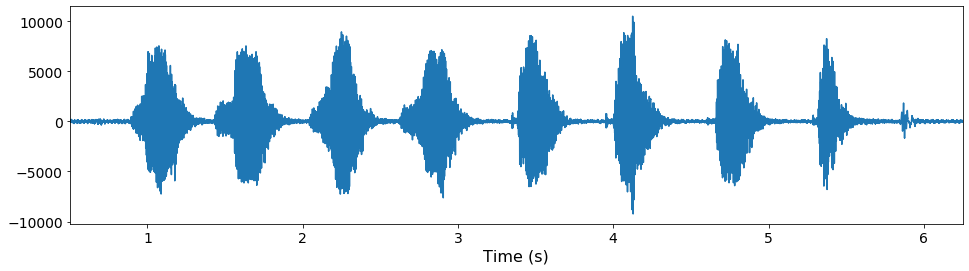

In [34]:
plt.figure(figsize=(16,4))
plt.plot(t_inds,data)
plt.xlabel('Time (s)',fontsize=label_size)
plt.xlim([t_plot_1,t_plot_2])
plt.tick_params(labelsize=tick_size)

## Signal zoomed in

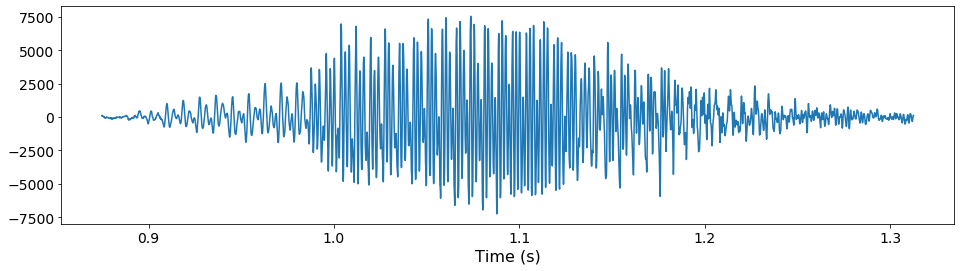

In [35]:
plt.figure(figsize=(16,4))
plt.plot(t_inds[ini:end],data_zoom)
plt.xlabel('Time (s)',fontsize=label_size)
plt.tick_params(labelsize=tick_size)

## FFT of the signal

(-4000, 4000)

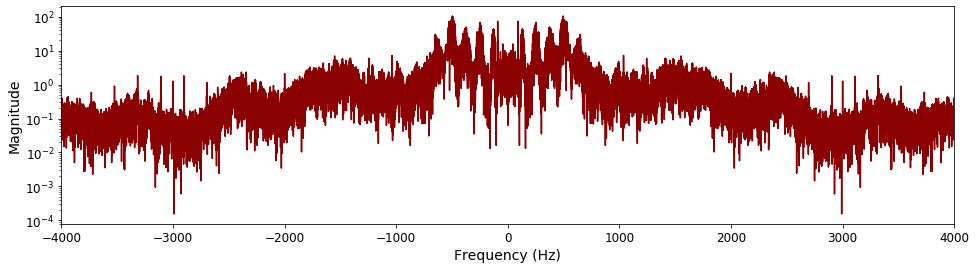

In [36]:
ft = np.fft.fft(data)
n = len(data)
plt.figure(figsize=(16,4))
freq_samples = np.linspace(-fs/2,fs/2,n)# np.arange(-fs/2,fs/n,fs/2)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft))/n,color='darkred')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-4000,4000))

## STFT of the signal

In [37]:

f, t, stft_coeffs = signal.stft(data, fs, nperseg=500,return_onesided=True)

Text(0.5, 0, 'Time (s)')

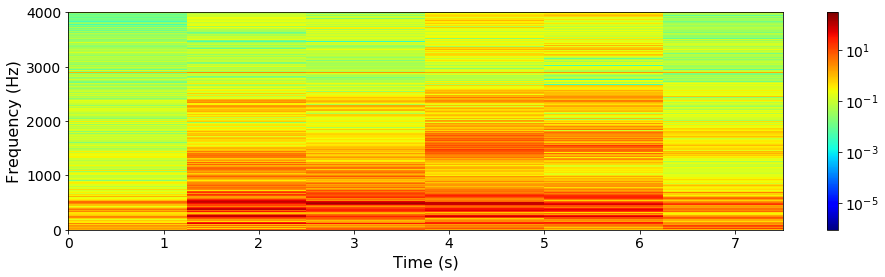

In [41]:
plt.figure(figsize=(16,4))
mag_stft_coeffs = np.abs(stft_coeffs)
plt.pcolormesh(t, f, np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
# plt.yscale('log')
cb = plt.colorbar()
# plt.show()
plt.tick_params(labelsize=tick_size)
cb.ax.tick_params(labelsize=tick_size)
plt.ylabel('Frequency (Hz)',fontsize=label_size)
plt.xlabel('Time (s)',fontsize=label_size)

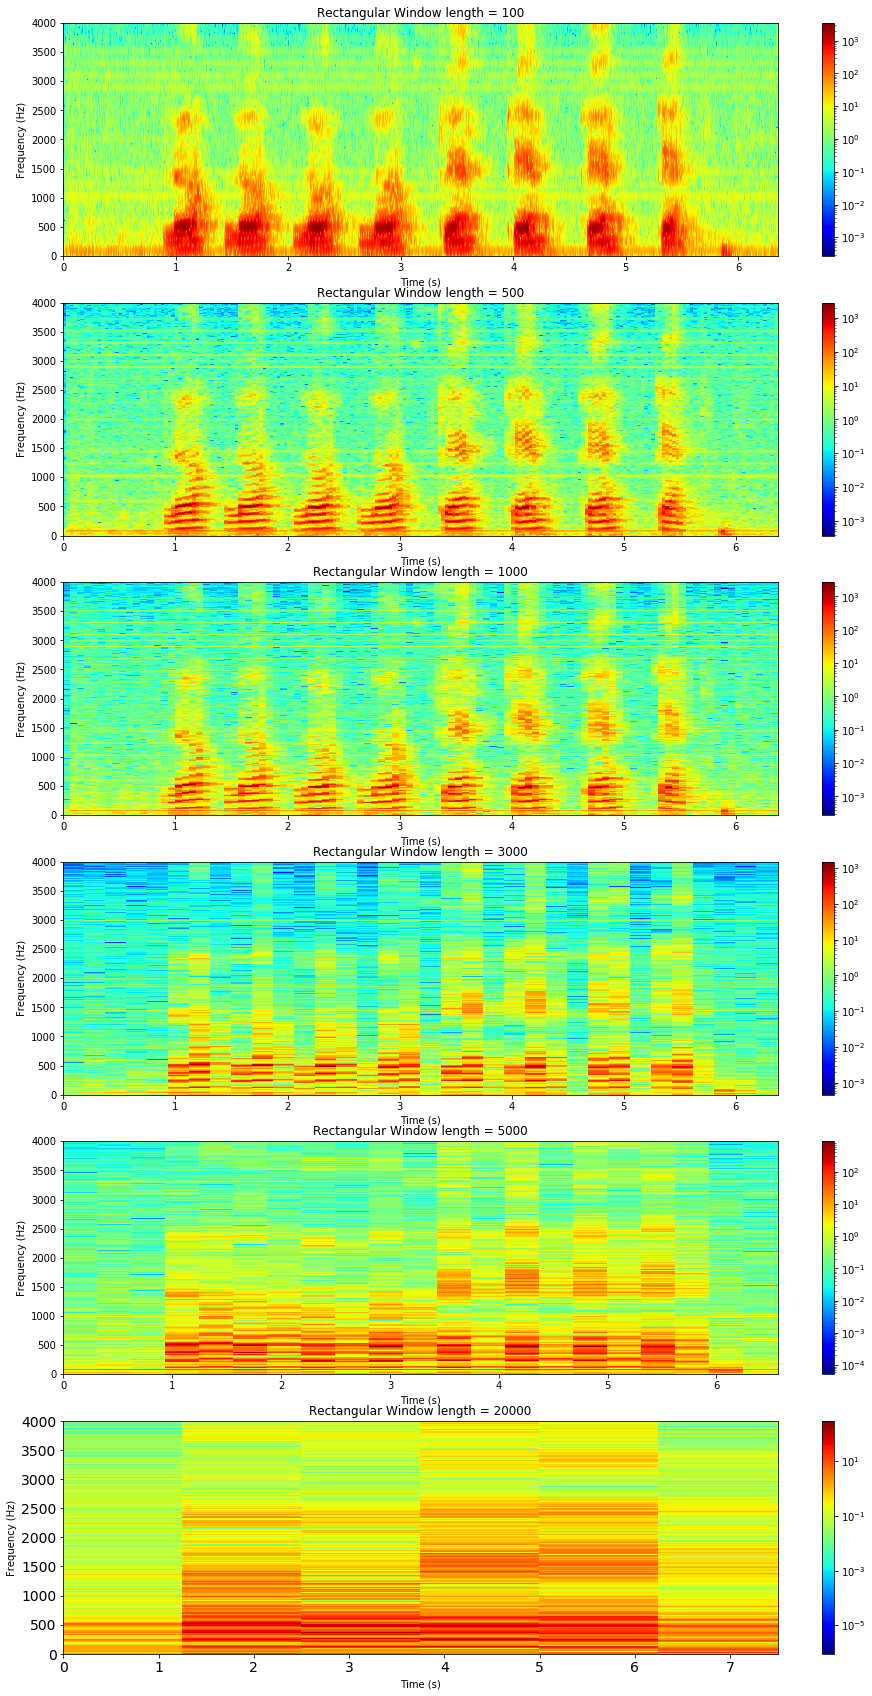

In [43]:
rect_window_size = [100, 500, 1000, 3000, 5000, 20000]
fig, axs = plt.subplots(6,figsize=[16,30])
i=0
for w in rect_window_size:
    window= signal.windows.boxcar(w)
    f, t, stft_coeffs = signal.stft(data, fs, nperseg=w,nfft= 20000,return_onesided=True)
    mag_stft_coeffs = np.abs(stft_coeffs)
    c=axs[i].pcolormesh(t, f, np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
    # plt.yscale('log')
    fig.colorbar(c, ax=axs[i])
    # plt.show()
    plt.tick_params(labelsize=tick_size)
    axs[i].set(ylabel='Frequency (Hz)', xlabel= 'Time (s)', title = f'Rectangular Window length = {w}')
    i+=1

(b) Use a rectangular window with different lengths. Use atleast $[500,1000,3000,5000,$ 20000]. Again, please look into nfft argument of scipy.signal.stft () as well.


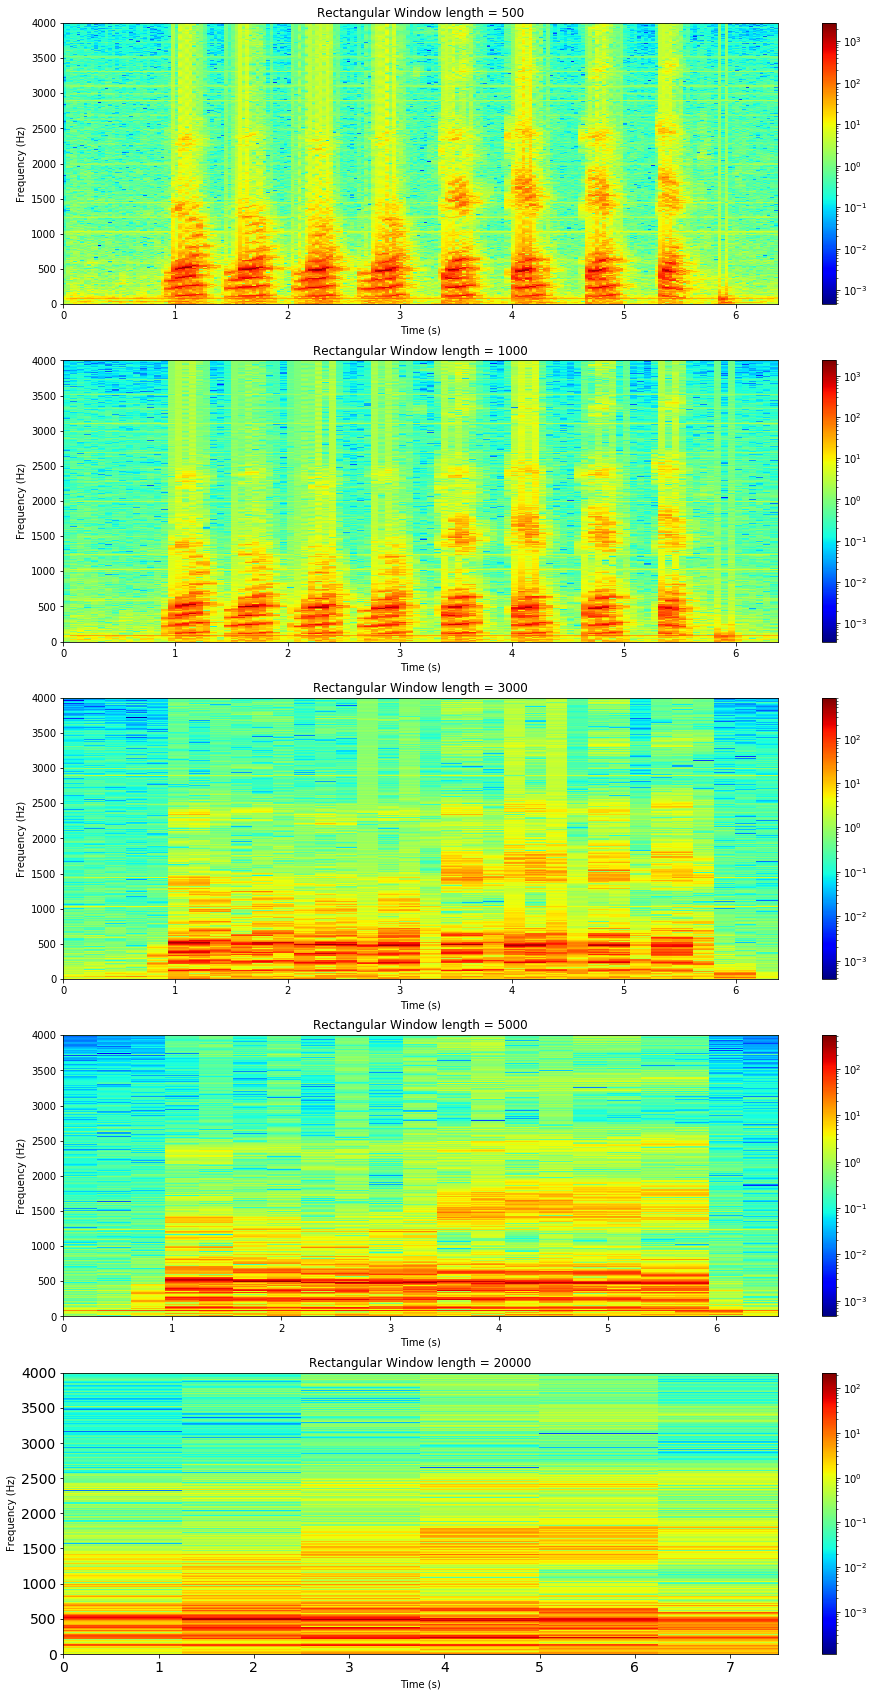

In [44]:
rect_window_size = [ 500, 1000, 3000, 5000, 20000]
fig, axs = plt.subplots(5,figsize=[16,30])
i=0
for w in rect_window_size:
    window= signal.windows.boxcar(w)
    f, t, stft_coeffs = signal.stft(data, fs, window = window, nperseg=w,nfft= 20000,return_onesided=True)
    mag_stft_coeffs = np.abs(stft_coeffs)
    c=axs[i].pcolormesh(t, f, np.abs(mag_stft_coeffs),norm=colors.LogNorm(vmin=mag_stft_coeffs.min(), vmax=mag_stft_coeffs.max()),cmap='jet') # vmin=0, vmax=amp
    # plt.yscale('log')
    fig.colorbar(c, ax=axs[i])
    # plt.show()
    plt.tick_params(labelsize=tick_size)
    axs[i].set(ylabel='Frequency (Hz)', xlabel= 'Time (s)', title = f'Rectangular Window length = {w}')
    i+=1

(c) What do you observe when you change the length of the window?

As the window length goes larger, more signal and more frequency but we lost some of the temporal resolution of changes in frequency. 

(d) What happens when you change from Hann window to rectangular window?

After changing from Hann window to rectangular window, we have  more continuous and more uniform in the spectrogram and it also has more high frequency components (we can also tell from the lecture notes). Also the rectangular window is not smooth at the ends.

In [65]:
2.00000000000000000000**2

4.000000000000002